In [1]:
!pip install -U imbalanced-learn

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

import os
import PIL
import cv2
import time
import shutil
import random
import pathlib
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix, classification_report

from imblearn.over_sampling import RandomOverSampler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Lambda,Flatten

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
train_dir ='/content/drive/My Drive/my_dataset/dataset'
validation_dir = '/content/drive/My Drive/my_dataset/val'

In [4]:
#img_height, img_width = 224, 224
img_height, img_width = 600, 600
batch_size = 32

# Path ke direktori data di Google Drive
data_dir = '/content/drive/My Drive/my_dataset/dataset'

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 102 files belonging to 3 classes.
Using 82 files for training.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 102 files belonging to 3 classes.
Using 20 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

['flower', 'plastik', 'wood']


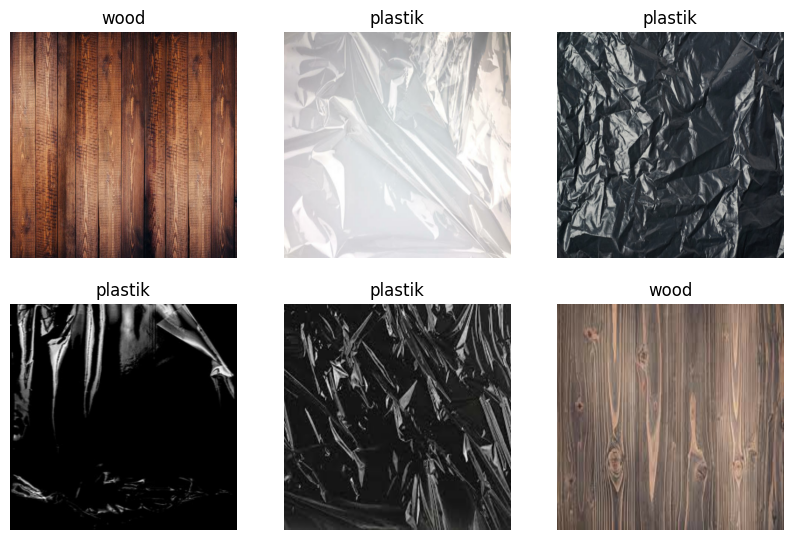

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
#resnet_model = Sequential()

#pretrained_model= tf.keras.applications.ResNet50(include_top=False,
#                   input_shape=(224,224,3),
#                   pooling='avg',classes=3,
#                   weights='imagenet')
#for layer in pretrained_model.layers:
#        layer.trainable=False

#resnet_model.add(pretrained_model)
#resnet_model.add(Flatten())
#resnet_model.add(Dense(1024, activation='relu'))
#resnet_model.add(Dense(3, activation='softmax'))

resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(600,600,3),
                   pooling='avg',classes=3,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False


resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(1024, activation='relu'))
resnet_model.add(Dropout(0.3)),
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dropout(0.3)),
resnet_model.add(Dense(3, activation='softmax'))


94765736/94765736 [==============================] - 1s 0us/step


In [9]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 3)                 1

In [10]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:

resnet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Assuming train_ds and val_ds are already defined and using sparse labels
history = resnet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    verbose=1
)

Epoch 1/10
3/3 [==============================] - 45s 14s/step - loss: 1.1740 - accuracy: 0.4146 - val_loss: 0.4697 - val_accuracy: 0.9000
Epoch 2/10
3/3 [==============================] - 4s 1s/step - loss: 0.7242 - accuracy: 0.7073 - val_loss: 0.1734 - val_accuracy: 1.0000
Epoch 3/10
3/3 [==============================] - 3s 824ms/step - loss: 0.2284 - accuracy: 0.9878 - val_loss: 0.0806 - val_accuracy: 1.0000
Epoch 4/10
3/3 [==============================] - 3s 819ms/step - loss: 0.0969 - accuracy: 0.9878 - val_loss: 0.0644 - val_accuracy: 1.0000
Epoch 5/10
3/3 [==============================] - 3s 825ms/step - loss: 0.0589 - accuracy: 1.0000 - val_loss: 0.0578 - val_accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 5s 907ms/step - loss: 0.0459 - accuracy: 1.0000 - val_loss: 0.0474 - val_accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 3s 847ms/step - loss: 0.0179 - accuracy: 1.0000 - val_loss: 0.0389 - val_accuracy: 1.0000
Epoch 8/10
3/3 [========

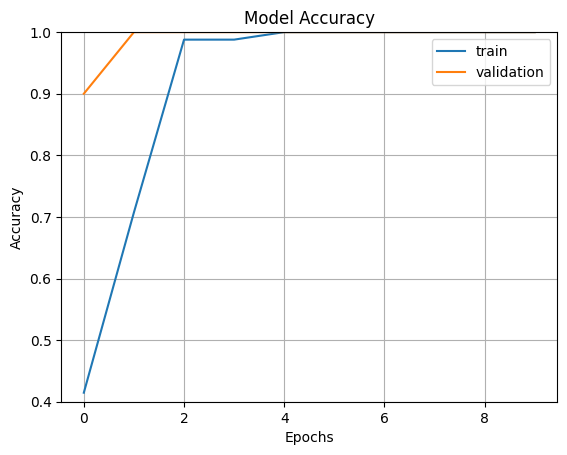

In [12]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

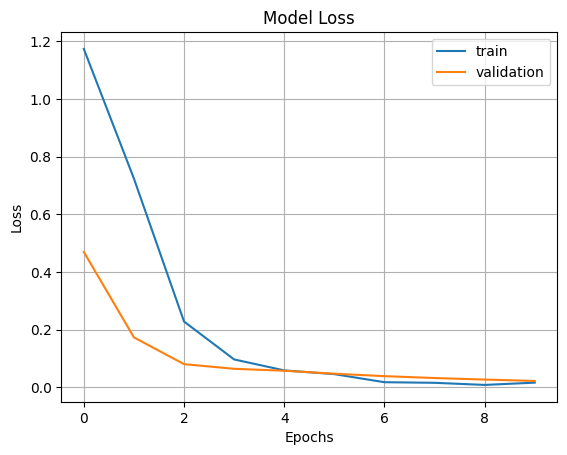

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

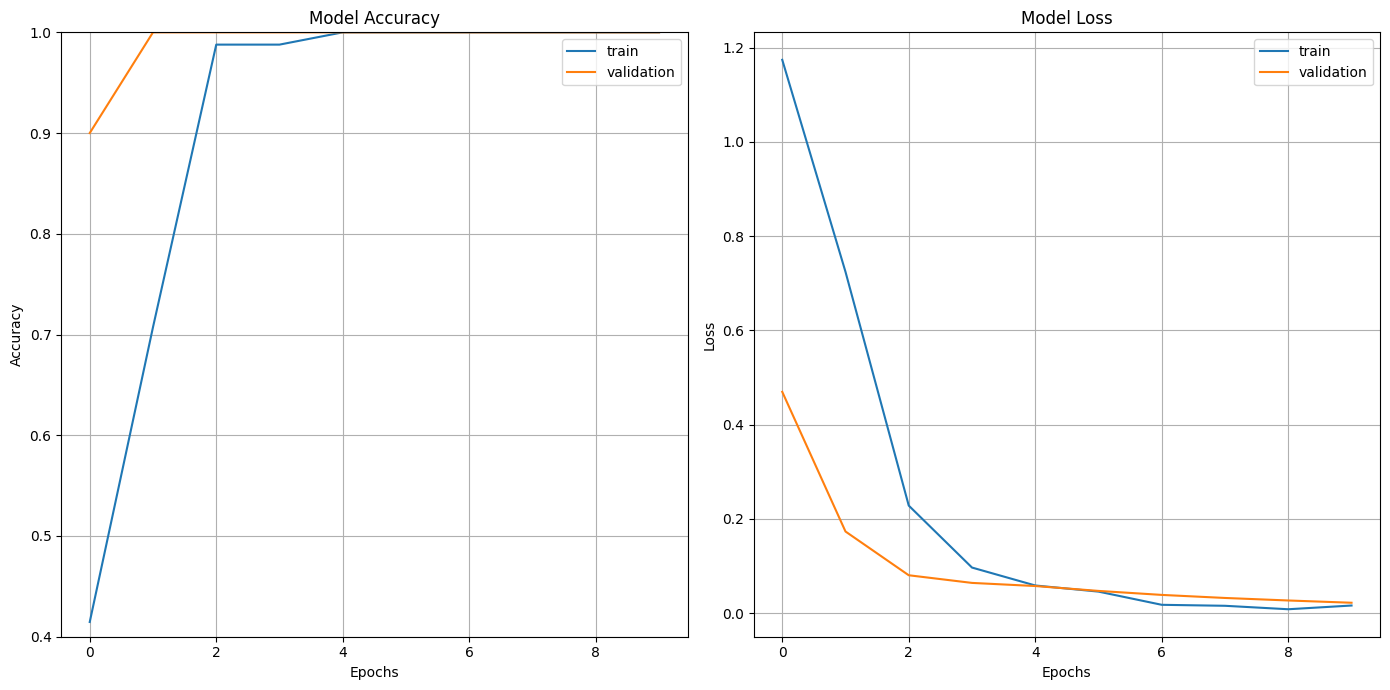

In [14]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])

plt.subplot(1, 2, 2)
fig2 = plt.gcf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])


plt.tight_layout()
plt.show()



In [16]:
import cv2
import numpy as np
import requests
from io import BytesIO

# Define the image URL
image_url = "https://cdn.britannica.com/45/5645-050-B9EC0205/head-treasure-flower-disk-flowers-inflorescence-ray.jpg"  # Change this to your image URL

# Function to load an image from a URL
def load_image_from_url(url, img_height, img_width):
    response = requests.get(url)  # Get the image from the URL
    image = np.asarray(bytearray(response.content), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)  # Decode from byte format to image format
    image_resized = cv2.resize(image, (img_height, img_width))  # Resize to model expected size
    return image_resized

# Assume img_height and img_width are defined elsewhere in your script
img_height, img_width = 600, 600  # Define or replace with your model's expected dimensions

# Load and process the image
image_resized = load_image_from_url(image_url, img_height, img_width)
image = np.expand_dims(image_resized, axis=0)  # Add batch dimension
print(image.shape)

# Assuming resnet_model and class_names are defined elsewhere in your script
pred = resnet_model.predict(image)
print(pred)

# Assuming class_names is defined as the list of class names corresponding to model outputs
output_class = class_names[np.argmax(pred)]
print("The predicted class is", output_class)


(1, 600, 600, 3)
1/1 [==============================] - 4s 4s/step
[[0.8436779  0.04797456 0.10834759]]
The predicted class is flower


In [ ]:
resnet_model.save('/content/drive/My Drive/training2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 858ms/step


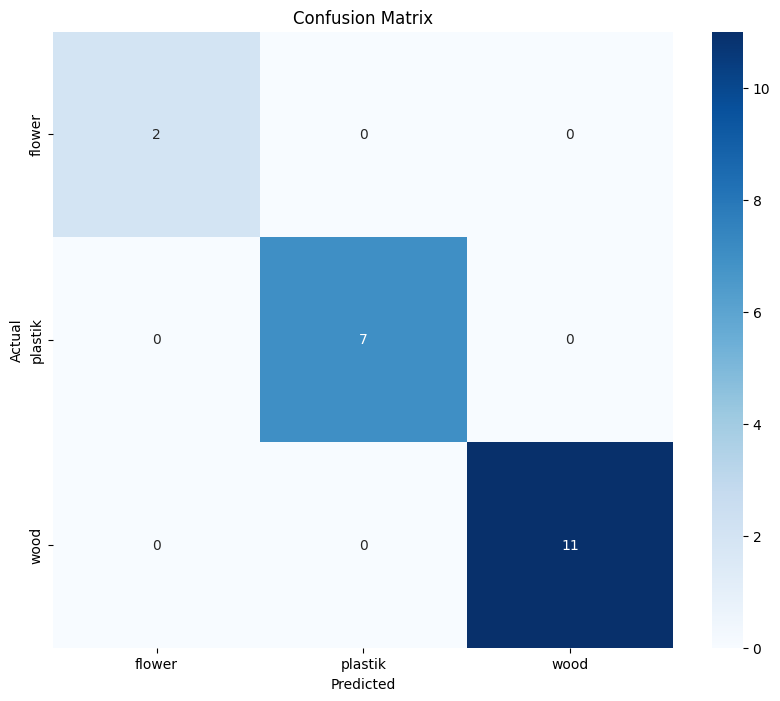

In [ ]:
true_labels = []
predicted_labels = []

for images, labels in val_ds:
    predictions = resnet_model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))
    true_labels.extend(labels.numpy())

true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
resnet_model.save('/content/drive/My Drive/training2_resnet50_e10_bs128_dense2048.tf')

In [ ]:
pretrained_model = ResNet50(include_top=False, input_shape=(224, 224, 3), pooling='avg', weights='imagenet')

# Freeze all layers initially
for layer in pretrained_model.layers:
    layer.trainable = False

# Build your model architecture
resnet_model_fine = Sequential([
    pretrained_model,
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.3),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # Assuming 3 classes
])

# Compile the model
resnet_model_fine.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

# Start initial training
history = resnet_model_fine.fit(train_ds, validation_data=val_ds, epochs=10, verbose=1)

# Start fine-tuning
# Unfreeze some of the top layers of the model
for layer in pretrained_model.layers[-30:]:  # Unfreeze the last 30 layers
    layer.trainable = True

# Recompile the model with a lower learning rate
resnet_model_fine.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # Lower learning rate for fine-tuning
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

# Continue training
fine_tune_epochs = 5
total_epochs = 10 + fine_tune_epochs

# Fit the model again
fine_tune_history = resnet_model_fine.fit(train_ds,
                                     validation_data=val_ds,
                                     epochs=total_epochs,
                                     initial_epoch=history.epoch[-1],
                                     verbose=1)

Epoch 1/10
3/3 [==============================] - 6s 799ms/step - loss: 1.0678 - accuracy: 0.5244 - val_loss: 0.4910 - val_accuracy: 0.9500
Epoch 2/10
3/3 [==============================] - 1s 195ms/step - loss: 0.4712 - accuracy: 0.8049 - val_loss: 0.2574 - val_accuracy: 0.9500
Epoch 3/10
3/3 [==============================] - 1s 174ms/step - loss: 0.2387 - accuracy: 0.9146 - val_loss: 0.1208 - val_accuracy: 1.0000
Epoch 4/10
3/3 [==============================] - 1s 174ms/step - loss: 0.1059 - accuracy: 0.9878 - val_loss: 0.0724 - val_accuracy: 1.0000
Epoch 5/10
3/3 [==============================] - 1s 167ms/step - loss: 0.0497 - accuracy: 1.0000 - val_loss: 0.0541 - val_accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 1s 174ms/step - loss: 0.0440 - accuracy: 0.9878 - val_loss: 0.0394 - val_accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 1s 219ms/step - loss: 0.0166 - accuracy: 1.0000 - val_loss: 0.0293 - val_accuracy: 1.0000
Epoch 8/10
3/3 [====

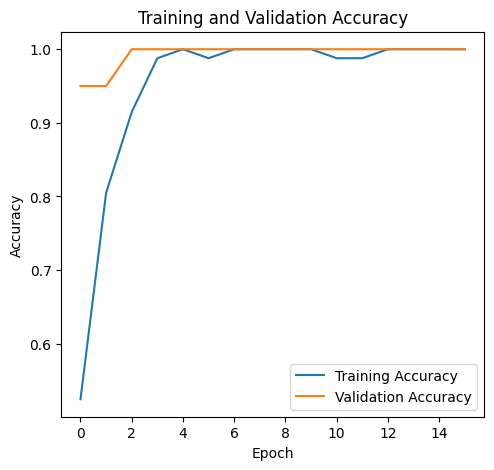

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'] + fine_tune_history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'] + fine_tune_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


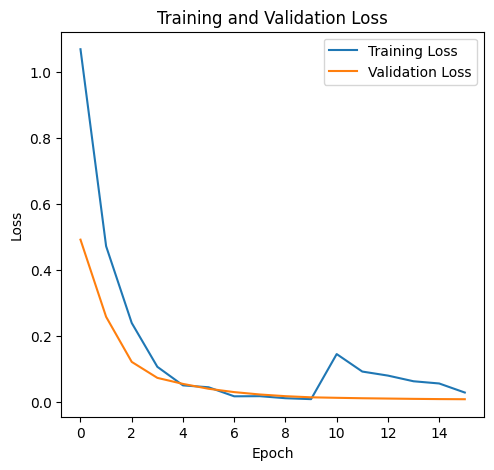

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'] + fine_tune_history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'] + fine_tune_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

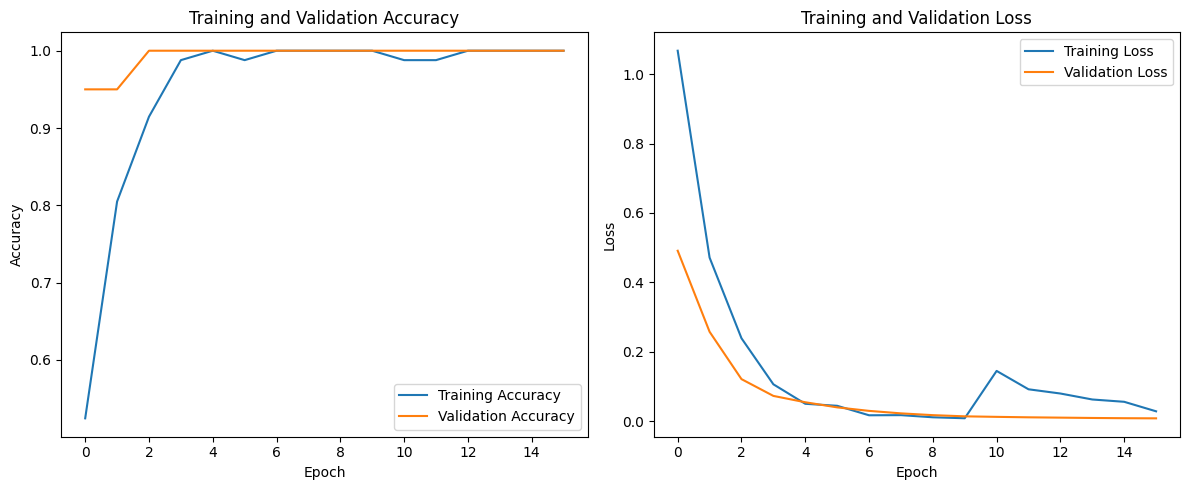

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'] + fine_tune_history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'] + fine_tune_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'] + fine_tune_history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'] + fine_tune_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()



plt.tight_layout()
plt.show()

In [ ]:
import cv2
import numpy as np
import requests
from io import BytesIO

# Define the image URL
image_url = "https://indieground.net/wp-content/uploads/2021/05/Freebie-PlasticTextures-Preview-05.jpg"  # Change this to your image URL

# Function to load an image from a URL
def load_image_from_url(url, img_height, img_width):
    response = requests.get(url)  # Get the image from the URL
    image = np.asarray(bytearray(response.content), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)  # Decode from byte format to image format
    image_resized = cv2.resize(image, (img_height, img_width))  # Resize to model expected size
    return image_resized

# Assume img_height and img_width are defined elsewhere in your script
img_height, img_width = 224, 224  # Define or replace with your model's expected dimensions

# Load and process the image
image_resized = load_image_from_url(image_url, img_height, img_width)
image = np.expand_dims(image_resized, axis=0)  # Add batch dimension
print(image.shape)

# Assuming resnet_model and class_names are defined elsewhere in your script
pred = resnet_model_fine.predict(image)
print(pred)

# Assuming class_names is defined as the list of class names corresponding to model outputs
output_class = class_names[np.argmax(pred)]
print("The predicted class with fine tuning is", output_class)


(1, 224, 224, 3)
1/1 [==============================] - 1s 892ms/step
[[5.4521370e-04 9.4799620e-01 5.1458593e-02]]
The predicted class with fine tuning is plastik


In [ ]:
resnet_model_fine.save('/content/drive/My Drive/trainingFine.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 1s/step


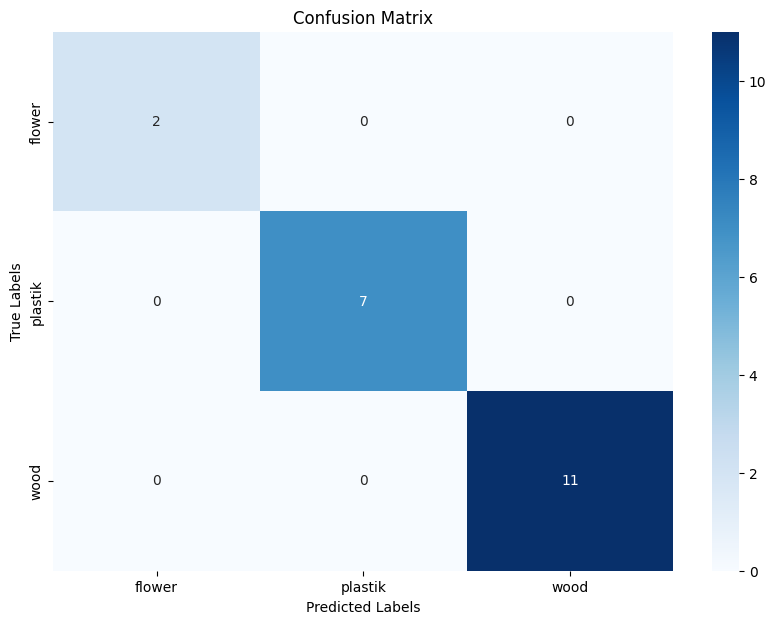

In [ ]:
model = resnet_model_fine  # Assuming resnet_model is your trained model

# Function to get labels and predictions
def get_labels_and_predictions(model, dataset):
    all_labels = []
    all_predictions = []
    for images, labels in dataset:
        preds = model.predict(images)
        predicted_classes = np.argmax(preds, axis=1)
        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted_classes)
    return np.array(all_labels), np.array(all_predictions)

# Get true labels and predicted labels from the validation dataset
true_labels, predictions = get_labels_and_predictions(model, val_ds)

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions)

# Define the class names
class_names = ['flower', 'plastik', 'wood']  # Replace with your actual class names

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#HASILLLL OKEEEEEE

**SAMPAI SINII DULU**

In [ ]:
# Save the model to Google Drive
model_save_path = '/content/drive/My Drive/training2/training2.h5'
model_resNet50.save(model_save_path)
print(f"Model saved to {model_save_path}")

In [ ]:
# Extract accuracy and loss from the history object
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs_range = range(1, len(acc) + 1)  # +1 because epoch indexing starts from 1


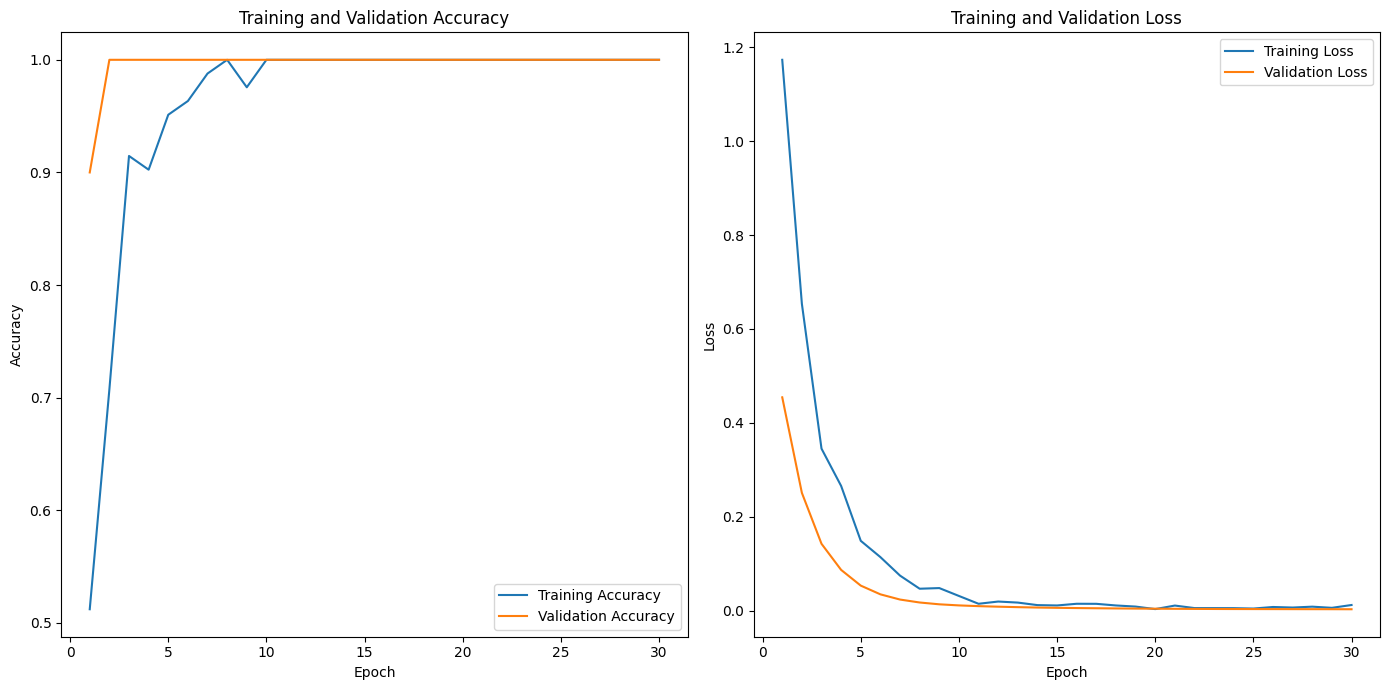

In [ ]:
plt.figure(figsize=(14, 7))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training and validation loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [ ]:
# Save the model to Google Drive
model_save_path = '/content/drive/My Drive/training2/training2.h5'
model_resNet50.save(model_save_path)
print(f"Model saved to {model_save_path}")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/My Drive/training2/training2.h5


In [ ]:
import cv2
import numpy as np
import requests
from io import BytesIO

# Define the image URL
image_url = "https://cdn.firstcry.com/education/2022/12/12101916/Flower-Names-In-English-For-Kids.jpg"  # Change this to your image URL

# Function to load an image from a URL
def load_image_from_url(url, img_height, img_width):
    response = requests.get(url)  # Get the image from the URL
    image = np.asarray(bytearray(response.content), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)  # Decode from byte format to image format
    image_resized = cv2.resize(image, (img_height, img_width))  # Resize to model expected size
    return image_resized

# Assume img_height and img_width are defined elsewhere in your script
img_height, img_width = 224, 224  # Define or replace with your model's expected dimensions

# Load and process the image
image_resized = load_image_from_url(image_url, img_height, img_width)
image = np.expand_dims(image_resized, axis=0)  # Add batch dimension
print(image.shape)

model_save_path = '/content/drive/My Drive/training2/training2.h5'

# Assuming resnet_model and class_names are defined elsewhere in your script
pred = model_resNet50.predict(image)
print(pred)

# Assuming class_names is defined as the list of class names corresponding to model outputs
output_class = class_names[np.argmax(pred)]
print("The predicted class is", output_class)

(1, 224, 224, 3)
1/1 [==============================] - 0s 23ms/step
[[9.9778950e-01 4.2704400e-04 1.7835055e-03]]
The predicted class is flower


In [ ]:
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras.preprocessing.image import load_img, img_to_array
class PreprocessLayer(tf.keras.layers.Layer):
    def call(self, inputs):
        return inputs  # Replace with actual preprocessing logic if necessary

# Register the custom layer in Keras' custom object scope
get_custom_objects().update({'PreprocessLayer': PreprocessLayer})

# Load the trained model from Google Drive
model_path = '/content/drive/My Drive/training2/training2.h5'  # Ganti dengan path yang sesuai
with tf.keras.utils.custom_object_scope({'PreprocessLayer': PreprocessLayer}):
    model = load_model(model_path)

# Define class names based on your training classes
class_names = ['flower', 'plastik', 'wood']  # Ganti dengan nama kelas yang sesuai


NameError: name 'load_model' is not defined

In [ ]:
# Define the image URL
image_url = "https://cdn.firstcry.com/education/2022/12/12101916/Flower-Names-In-English-For-Kids.jpg"  # Ganti dengan URL gambar Anda

# Function to load an image from a URL
def load_image_from_url(url, img_height, img_width):
    response = requests.get(url)  # Get the image from the URL
    image = np.asarray(bytearray(response.content), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)  # Decode from byte format to image format
    image_resized = cv2.resize(image, (img_height, img_width))  # Resize to model expected size
    return image_resized

# Define image dimensions
img_height, img_width = 224, 224  # Define sesuai dengan model Anda

# Load and process the image
image_resized = load_image_from_url(image_url, img_height, img_width)
image = np.expand_dims(image_resized, axis=0)  # Add batch dimension
image = image / 255.0  # Normalize image

print("Image shape:", image.shape)

# Make prediction using the loaded model
pred = model.predict(image)
print("Prediction probabilities:", pred)

# Get the class with the highest probability
output_class = class_names[np.argmax(pred)]
print("The predicted class is:", output_class)

Image shape: (1, 224, 224, 3)


1/1 [==============================] - 1s 1s/step
Prediction probabilities: [[0.07426427 0.49028388 0.4354518 ]]
The predicted class is: plastik
